Copyright (C) Her Majesty the Queen in Right of Canada,
as represented by the Minister of Natural Resources Canada

# Basic simulation: run and plot the tutorial 3 project.#

This demonstrates basic use of the [cbm3_python](https://github.com/cat-cfs/cbm3_python) library for automating the simulation of exisiting CBM-CFS3 project databases.

In [5]:
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

set up the supporting CBM-CFS3 tools

In [6]:
import cbm3_python_helper
cbm3_python_helper.load_cbm3_python()
import cbm3_python.simulation.projectsimulator
from cbm3_python.cbm3data import cbm3_results

In [7]:
toolbox_path = r'C:\Program Files (x86)\Operational-Scale CBM-CFS3'
project_db_path = os.path.join(toolbox_path, "Tutorials", "Tutorial 3", "Tutorial3.mdb")
results_db_path = os.path.join(toolbox_path, "Tutorials", "Tutorial 3","Tutorial3_results.mdb")

results_db_path = cbm3_python.simulation.projectsimulator.run(
    aidb_path=os.path.join(toolbox_path, "admin", "dbs", "ArchiveIndex_Beta_Install.mdb"), 
    project_path=project_db_path, 
    toolbox_installation_dir=toolbox_path,
    cbm_exe_path=os.path.join(toolbox_path, "admin", "executables"),
    results_database_path= results_db_path)

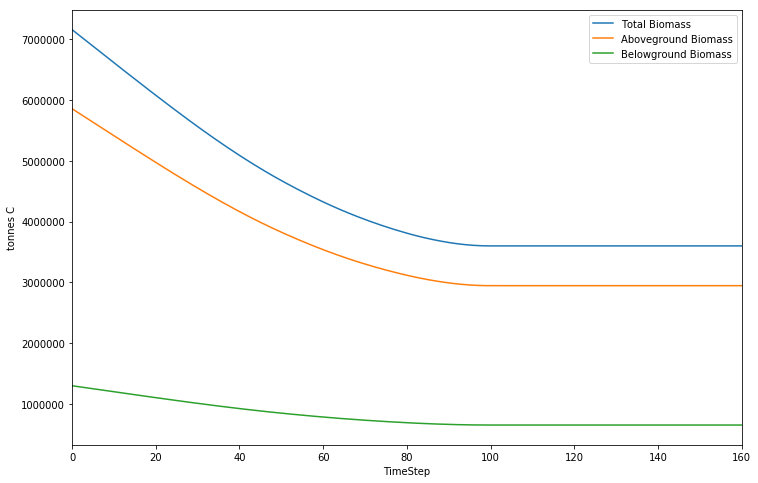

In [8]:
cols = ["TimeStep", "Total Biomass", "Aboveground Biomass", "Belowground Biomass"]
df = cbm3_results.load_pool_indicators(results_db_path)[cols].groupby("TimeStep").sum()
df.plot(figsize=(12,8))
plt.ylabel("tonnes C")
plt.show()